1. Step by Step object detection 

In [1]:
!pip install -q mediapipe

In [2]:
# download off-the shelf model (had to brew install wget), moved to 'models' folder
!wget -q -O efficientdet.tflite -q https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/int8/1/efficientdet_lite0.tflite

In [3]:
model_path = "/../models/efficientdet.tflite"

### Visualization utilities 

In [4]:
#functions to visualize the object detection results.
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

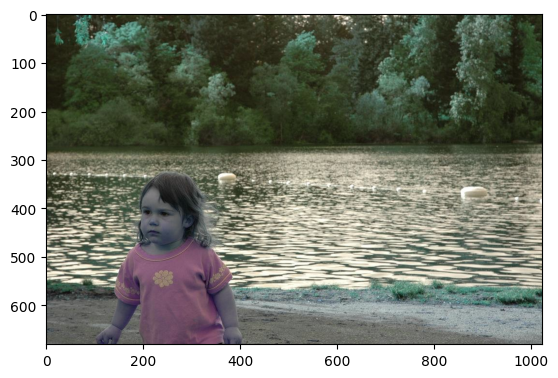

In [5]:
import matplotlib.pyplot as plt
# import image
image_path = "../data/Saliency4ASD/TrainingData/Images/1.png"
img= cv2.imread(image_path)
plt.imshow(img)


I0000 00:00:1711647342.749160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


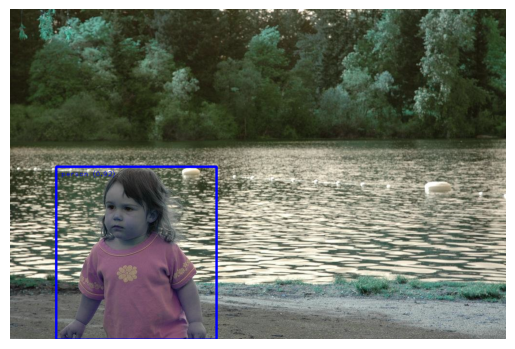

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='efficientdet.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

# STEP 3: Load the input image.
img = "../data/Saliency4ASD/TrainingData/Images/1.png"  
image = mp.Image.create_from_file(img)

# STEP 4: Detect objects in the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)  # Define the visualize function
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the annotated image using matplotlib
plt.imshow(rgb_annotated_image)
plt.axis('off')  # Turn off axis
plt.show()

__________________________________________________ 


2. Loop through all the images for object detection an return rectangle coordinates 

_______________________________________________________________________________________

3. Check only for objects that are in scanpath

__________________________________________________________________________________________________

4. Calculate features from objects thar are within scanpath

In [ ]:
# loop scanpaths
sps = ut.load_scanpath(sp_file)
for sp_i, sp in enumerate(sps):
# id
    id = ut.get_sp_id(sp_file, sp_i)
    df_sp = pd.DataFrame(pd.Series(id), columns=["id"])

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# Load Mediapipe object detection model
mp_objectron = mp.solutions.objectron
objectron = mp_objectron.Objectron()

# Load gaze coordinates x,y, duration 
gaze_data = [...]  # Load your gaze data here

# Load 300 images
images = [...]  # Load your images here

# Initialize list to store extracted features
extracted_features = []

# Process each image
for image, gaze_coords in zip(images, gaze_data):
    # Convert image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform object detection
    results = objectron.process(image_rgb)

    # Extract features from detected objects that fall within gaze coordinates
    if results.detected_objects:
        for detected_object in results.detected_objects:
            # Extract bounding box coordinates of detected object
            bbox = detected_object.bounding_box

            # Check if gaze coordinates fall within bounding box
            if bbox[0].x < gaze_coords[0] < bbox[2].x and bbox[0].y < gaze_coords[1] < bbox[2].y:
                # Extract features from detected_object
                features = [...]  # Extract features here
                extracted_features.append(features)

# Convert extracted features to numpy array
extracted_features = np.array(extracted_features)


In [ ]:

# Get the current directory
mp_drawing = mp.solutions.drawing_utils
mp_objectron = mp.solutions.objectron
images_folder = os.path.join("data", "Saliency4ASD", "TrainingData", "Images")

detected_objects_list = []

with mp_objectron.Objectron(static_image_mode=True) as objectron:
    for filename in os.listdir(images_folder):
        if filename.endswith(".png"):  # Assuming images are in PNG format
            image_path = os.path.join(images_folder, filename)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = objectron.process(image_rgb)

            detected_objects = []
            for detected_object in results.detected_objects:
                object_name = detected_object.class_name
                bounding_box = detected_object.bounding_box.flatten().tolist()
                detected_objects.append({"object_name": object_name, "bounding_box": bounding_box})

            detected_objects_list.append(detected_objects)

print(detected_objects_list)

RuntimeError: ValidatedGraphConfig Initialization failed.
ImageToTensorCalculator: ; RET_CHECK failure (mediapipe/calculators/tensor/image_to_tensor_calculator.cc:144) ValidateOptionOutputDims(options) returned INTERNAL: ; RET_CHECK failure (./mediapipe/calculators/tensor/image_to_tensor_utils.h:136) options.has_output_tensor_float_range() || options.has_output_tensor_int_range() || options.has_output_tensor_uint_range()Output tensor range is required. 
InferenceCalculatorCpu: ; RET_CHECK failure (mediapipe/calculators/tensor/inference_calculator_cpu.cc:63) !options.model_path().empty() ^ kSideInModel(cc).IsConnected()Either model as side packet or model path in options is required.
ImageToTensorCalculator: ; RET_CHECK failure (mediapipe/calculators/tensor/image_to_tensor_calculator.cc:144) ValidateOptionOutputDims(options) returned INTERNAL: ; RET_CHECK failure (./mediapipe/calculators/tensor/image_to_tensor_utils.h:136) options.has_output_tensor_float_range() || options.has_output_tensor_int_range() || options.has_output_tensor_uint_range()Output tensor range is required. 
SplitTensorVectorCalculator: The number of output streams should match the number of ranges specified in the CalculatorOptions.